In [1]:
import requests
import xml.etree.ElementTree as ET

# Replace 'YOUR_API_KEY' with your actual API key
api_key = ''

# Define the URL for the FRED API
url = f'https://api.stlouisfed.org/fred/category'

# Define parameters for the request
params = {
    'api_key': api_key,
    'file_type': 'xml'  # You can change this to 'json' if you prefer JSON responses
}

# Send the GET request to retrieve data categories
response = requests.get(url, params=params)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    # Parse the XML response
    root = ET.fromstring(response.text)
    
    # Iterate through categories and print their attributes
    for category in root.findall('category'):
        category_id = category.get('id')
        category_name = category.get('name')
        parent_id = category.get('parent_id')
        
        print(f"Category ID: {category_id}")
        print(f"Category Name: {category_name}")
        print(f"Parent ID: {parent_id}")
        print("\n")
else:
    print(f"HTTP Request Error: {response.status_code}")
    print(response.text)


Category ID: 0
Category Name: Categories
Parent ID: 0




In [ ]:
import requests
import json

# Replace 'YOUR_API_KEY' with your actual API key
api_key = '76bddb0c9629d408144bdd221ddbdbf1'

# Define the URL for the FRED API to get child categories
category_id = 13  # Replace with the desired parent category ID
url = f'https://api.stlouisfed.org/fred/category/children'

# Define parameters for the request
params = {
    'api_key': api_key,
    'file_type': 'json',  # You can change this to 'xml' if you prefer XML responses
    'category_id': category_id
}

# Send the GET request to retrieve child categories
response = requests.get(url, params=params)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    if params['file_type'] == 'json':
        # Parse the JSON response for JSON format
        data = response.json()
        categories = data.get('categories', [])
    else:
        # Parse the XML response for XML format (if needed)
        pass  # You can add XML parsing code here
        
    # Iterate through child categories and print their attributes
    for category in categories:
        child_category_id = category.get('id')
        child_category_name = category.get('name')
        child_parent_id = category.get('parent_id')
        
        print(f"Child Category ID: {child_category_id}")
        print(f"Child Category Name: {child_category_name}")
        print(f"Parent ID: {child_parent_id}")
        print("\n")
else:
    print(f"HTTP Request Error: {response.status_code}")
    print(response.text)


In [ ]:
import requests
import json

# Replace 'YOUR_API_KEY' with your actual API key
api_key = ''

# Define the URL for the FRED API to get child categories
url = f'https://api.stlouisfed.org/fred/category/children'

# Initialize a list to store category information
all_categories = []

# Iterate through category IDs from 1 to 150
for category_id in range(1, 25):
    # Define parameters for the request
    params = {
        'api_key': api_key,
        'file_type': 'json',  # You can change this to 'xml' if you prefer XML responses
        'category_id': category_id
    }

    # Send the GET request to retrieve child categories
    response = requests.get(url, params=params)

    # Check if the request was successful (HTTP status code 200)
    if response.status_code == 200:
        # Parse the JSON response for JSON format
        data = response.json()
        categories = data.get('categories', [])
        
        # Add the parent category information to the list
        parent_category = {
            'id': category_id,
            'child_categories': categories
        }
        all_categories.append(parent_category)
    else:
        print(f"HTTP Request Error for Category ID {category_id}: {response.status_code}")
        print(response.text)

# Iterate through all categories and print their information
for category in all_categories:
    parent_category_id = category['id']
    child_categories = category['child_categories']
    
    print(f"Parent Category ID: {parent_category_id}")
    print("Child Categories:")
    
    for child_category in child_categories:
        child_category_id = child_category.get('id')
        child_category_name = child_category.get('name')
        
        print(f"  Child Category ID: {child_category_id}")
        print(f"  Child Category Name: {child_category_name}")
    
    print("\n")


In [13]:
# Series inside a category 

import requests

# Replace 'YOUR_API_KEY' with your actual API key
api_key = ''

# Define the category ID for which you want to retrieve series
category_id = 33969  # Example category ID, change as needed

# Define the URL for the FRED API to get series in a category
url = f'https://api.stlouisfed.org/fred/category/series'

# Define parameters for the request
params = {
    'api_key': api_key,
    'file_type': 'json',  # You can change this to 'xml' if you prefer XML responses
    'category_id': category_id,
}

# Send the GET request to retrieve series in the specified category
response = requests.get(url, params=params)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    series_list = data.get('seriess', [])

    if series_list:
        print(f"Series in Category ID {category_id}:")
        for series in series_list:
            series_id = series.get('id')
            title = series.get('title')
            description = series.get('notes', '')
            print(f"- Series ID: {series_id}")
            print(f"  - Title: {title}")
            print(f"  - Description: {description}")
    else:
        print(f"No series found in Category ID {category_id}")
else:
    print(f"HTTP Request Error: {response.status_code}")
    print(response.text)


Series in Category ID 33969:
- Series ID: IPUGN4231L000000000
  - Title: Labor Productivity for Wholesale Trade: Motor Vehicle and Motor Vehicle Parts and Supplies Merchant Wholesalers (NAICS 4231) in the United States
  - Description: Labor productivity describes the efficiency at which labor hours are utilized in producing output of goods and services, measured as output per hour of labor.
- Series ID: IPUGN4231L001000000
  - Title: Labor Productivity for Wholesale Trade: Motor Vehicle and Motor Vehicle Parts and Supplies Merchant Wholesalers (NAICS 4231) in the United States
  - Description: Labor productivity describes the efficiency at which labor hours are utilized in producing output of goods and services, measured as output per hour of labor.
- Series ID: IPUGN4231L010000000
  - Title: Hours Worked for Wholesale Trade: Motor Vehicle and Motor Vehicle Parts and Supplies Merchant Wholesalers (NAICS 4231) in the United States
  - Description: Labor hours are measured as annual hou

In [12]:
# Lets display now a series (metadata)

import requests
from tabulate import tabulate

# Replace 'YOUR_API_KEY' with your actual API key
api_key = ''

# Replace 'YOUR_SERIES_ID' with the series ID you want to retrieve
series_id = 'CSUSHPINSA'

# Define the URL for the FRED API to get data for a series
url = f'https://api.stlouisfed.org/fred/series'

# Define parameters for the request
params = {
    'api_key': api_key,
    'file_type': 'json',  # You can change this to 'xml' if you prefer XML responses
    'series_id': series_id,
}

# Send the GET request to retrieve data for the specified series
response = requests.get(url, params=params)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    series_data = data.get('seriess', [])[0]

    if series_data:
        # Extract series information
        series_title = series_data.get('title')
        series_observation_start = series_data.get('observation_start')
        series_observation_end = series_data.get('observation_end')
        series_frequency = series_data.get('frequency')
        series_units = series_data.get('units')
        series_seasonal_adjustment = series_data.get('seasonal_adjustment')
        series_last_updated = series_data.get('last_updated')
        series_notes = series_data.get('notes', '')

        # Create a table
        table = [
            ['Series ID', series_id],
            ['Title', series_title],
            ['Observation Start Date', series_observation_start],
            ['Observation End Date', series_observation_end],
            ['Frequency', series_frequency],
            ['Units', series_units],
            ['Seasonal Adjustment', series_seasonal_adjustment],
            ['Last Updated', series_last_updated],
            ['Notes', series_notes],
        ]

        # Print the table
        print(tabulate(table, headers=['Attribute', 'Value'], tablefmt='grid'))
    else:
        print(f"No data found for Series ID {series_id}")
else:
    print(f"HTTP Request Error: {response.status_code}")
    print(response.text)


+------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Attribute              | Value                                                                                                                                                                                                                                                                                                                                                             |
+========================+================================================================================================================================================================================================================

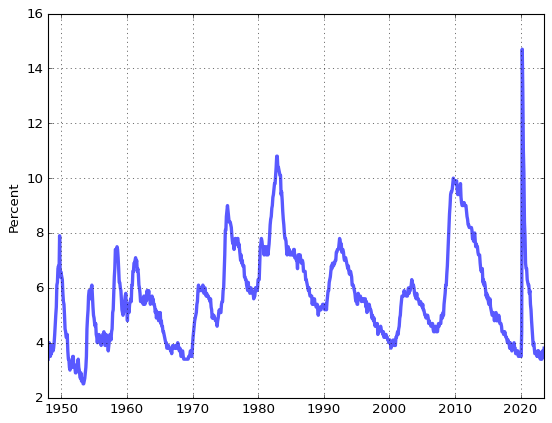

In [6]:
import pandas as pd
import numpy as np
import fredpy as fp
import matplotlib.pyplot as plt

# Use matplotlib's 'classic' style, set figure facecolor to white
plt.style.use('classic')
plt.rcParams.update({'figure.facecolor': 'white'})

fp.api_key = '76bddb0c9629d408144bdd221ddbdbf1'

fig = plt.figure()
u = fp.series('UNRATE')
plt.plot(u.data.index,u.data.values,'-',lw=3,alpha = 0.65)
plt.grid()
plt.ylabel('Percent');

date
1947-01-01     2034.450
1947-04-01     2029.024
1947-07-01     2024.834
1947-10-01     2056.508
1948-01-01     2087.442
                ...    
2022-04-01    19895.271
2022-07-01    20054.663
2022-10-01    20182.491
2023-01-01    20282.760
2023-04-01    20386.467
Freq: QS-OCT, Name: value, Length: 306, dtype: float64 



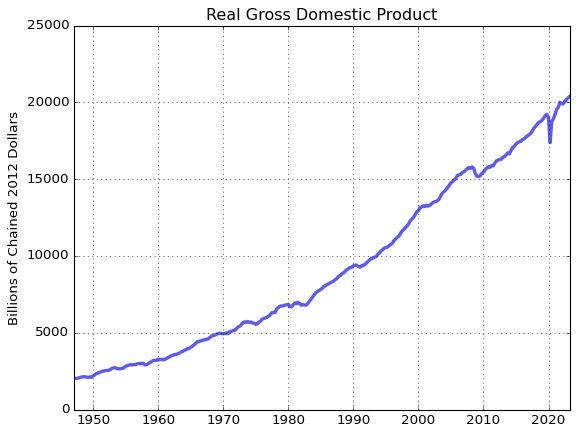

In [7]:
# Download quarterly real GDP data using `fredpy`. Save the data in a variable called gdp
gdp = fp.series('gdpc1')

print(gdp.data,'\n')

# Plot real GDP data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gdp.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(gdp.title)
ax.set_ylabel(gdp.units);

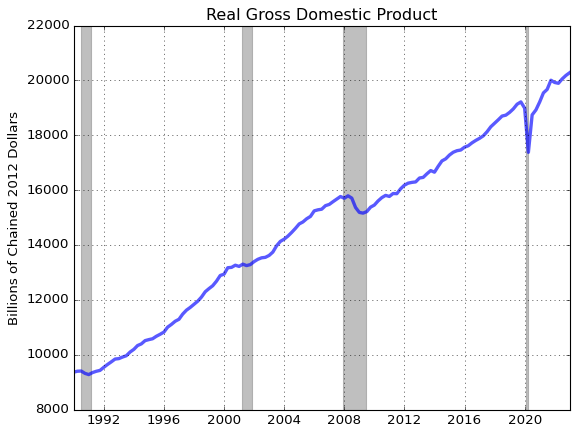

In [8]:
import pandas as pd
import numpy as np
import fredpy as fp
import matplotlib.pyplot as plt

# Use matplotlib's 'classic' style, set figure facecolor to white
plt.style.use('classic')
plt.rcParams.update({'figure.facecolor': 'white'})

fp.api_key = ''


# Restrict GDP to observations from January 1, 1990 to present
win = ['01-01-1990','01-01-2023']
gdp_win = gdp.window(win)

# Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gdp_win.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(gdp_win.title)
ax.set_ylabel(gdp_win.units)

# Plot recession bars
gdp_win.recessions()